In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Elechiguerra/Desktop/IRONHACK-DataScience/Unit5-EDA/23Sep/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.

In [5]:
# Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
# Are there categories where being a best-seller is more prevalent?
# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [6]:
crosstab_result = pd.crosstab(df['isBestSeller'], df['category'])

crosstab_result

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [7]:
# Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [8]:
from scipy.stats import chi2_contingency

In [9]:
# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [10]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

In [11]:
#Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [12]:
print(crosstab_result.head())

category      3D Printers  3D Printing & Scanning  \
isBestSeller                                        
False                 247                    4065   
True                    1                       2   

category      Abrasive & Finishing Products  Action Cameras  Adapters  \
isBestSeller                                                            
False                                   245            1696       251   
True                                      5               1         3   

category      Agricultural Equipment & Supplies  Alexa Built-In Devices  \
isBestSeller                                                              
False                                      8421                     106   
True                                        109                       1   

category      Art & Craft Supplies  Arts & Crafts   Baby  ...  \
isBestSeller                                              ...   
False                          253           9319  14709  ...  

In [40]:
sorted_df = df.sort_values(by="category", ascending=False)
top_20 = crosstab_result.head(20)
top_20

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
price,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


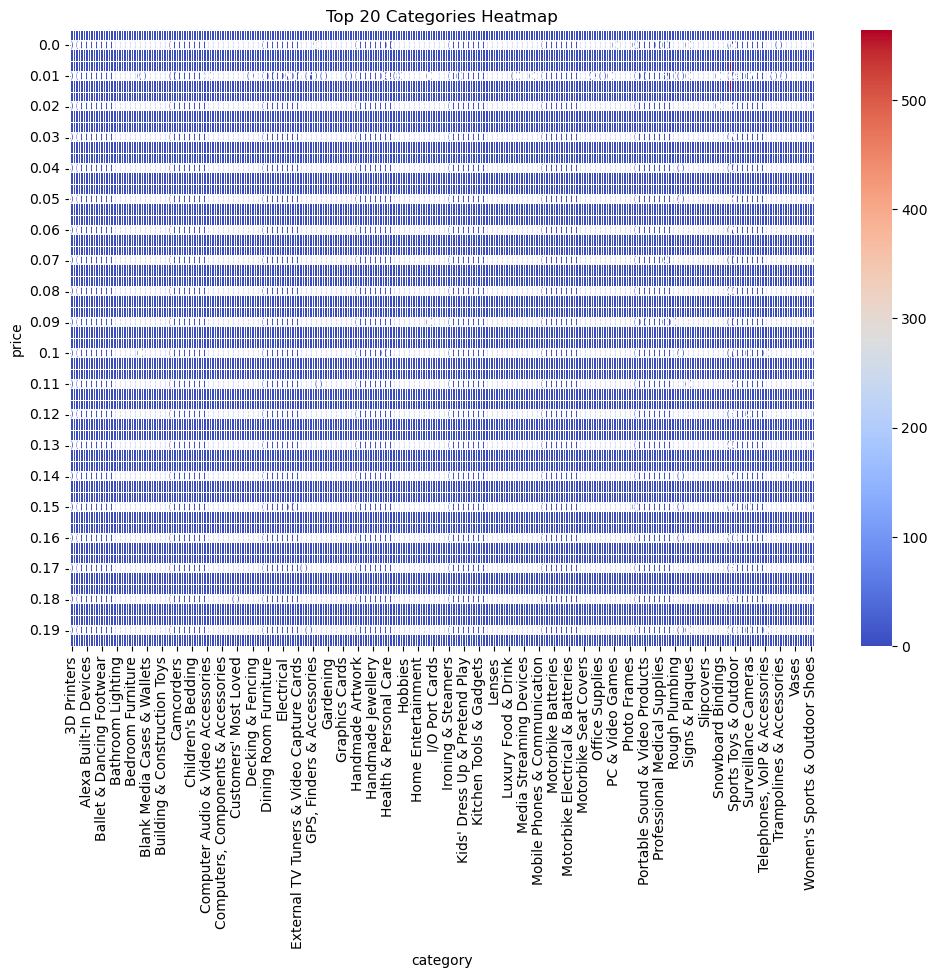

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(top_20, cmap='coolwarm', annot=True, fmt="d", linewidths=.5)
plt.title("Top 20 Categories Heatmap")
plt.xlabel("category")
plt.ylabel("price")  # You can customize this label as needed
plt.show()

In [16]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

In [17]:
crosstab_result = pd.crosstab(df['price'], df['category'])

crosstab_result

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
price,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22933.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482.73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24674.59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#  Preliminary Step: Remove outliers in product prices.
# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.


In [19]:
data= df["price"]
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [20]:

# Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

In [31]:
sorted_df = df.sort_values(by="category", ascending=False)
top_20_categories = sorted_df.head(20)
sorted_df.head (20)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,category_group
681892,734618,B09BSQ8PRD,"Kindle Scribe (64 GB), the first Kindle and di...",4.2,548,329.99,False,0,eBook Readers & Accessories,Other
2325301,2680811,B0BGS7D7BM,Foluu Case for All-new Kindle (2022 release) 1...,4.0,24,14.99,False,0,eBook Readers & Accessories,Other
2325299,2680809,B0CJP6CF8Z,UKCOCO e-reader protective case e-reader prote...,0.0,0,17.59,False,0,eBook Readers & Accessories,Other
2325298,2680808,B0BFBQMH3J,Amazon Kindle Paperwhite Leather Cover | Compa...,4.6,3135,39.99,False,0,eBook Readers & Accessories,Other
2325297,2680807,B0CGMRB52P,Mikikit 6 pcs case ereaders e readers E- reade...,0.0,0,23.10,False,0,eBook Readers & Accessories,Other
2325296,2680806,B09HXT45JQ,Kindle Paperwhite Signature Edition | 32 GB wi...,4.7,3674,179.99,False,0,eBook Readers & Accessories,Other
2325295,2680805,B00426WZN8,Sony Reader Pocket Edition PRS-350 - eBook rea...,3.5,35,119.99,False,0,eBook Readers & Accessories,Other
2325294,2680804,B0CG1ZVDKS,Hemobllo ebook reader protector protective cov...,0.0,0,12.95,False,0,eBook Readers & Accessories,Other
2325293,2680803,B09X3ZF337,FANRTE Universal Case Cover for 6-6.8inch Kind...,4.5,134,8.88,False,0,eBook Readers & Accessories,Other
2325292,2680802,B0CHDMF8ZV,UKCOCO ebook reader protector ebook reader cov...,0.0,0,14.79,False,0,eBook Readers & Accessories,Other


C:\Users\Elechiguerra\AppData\Local\Temp\ipykernel_13308\2866286263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sorted_df.head(20), x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

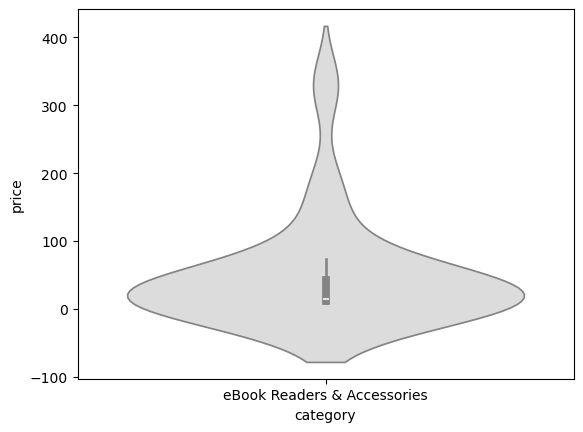

In [33]:
sns.violinplot(data=sorted_df.head(20), x='category', y='price', palette="coolwarm")

In [27]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [22]:
# Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.


In [57]:
sorted_df = df.sort_values(by="category", ascending=False)
top_20_categories = sorted_df.head(10)
sorted_df.head (10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,category_group
681892,734618,B09BSQ8PRD,"Kindle Scribe (64 GB), the first Kindle and di...",4.2,548,329.99,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325301,2680811,B0BGS7D7BM,Foluu Case for All-new Kindle (2022 release) 1...,4.0,24,14.99,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325299,2680809,B0CJP6CF8Z,UKCOCO e-reader protective case e-reader prote...,0.0,0,17.59,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325298,2680808,B0BFBQMH3J,Amazon Kindle Paperwhite Leather Cover | Compa...,4.6,3135,39.99,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325297,2680807,B0CGMRB52P,Mikikit 6 pcs case ereaders e readers E- reade...,0.0,0,23.10,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325296,2680806,B09HXT45JQ,Kindle Paperwhite Signature Edition | 32 GB wi...,4.7,3674,179.99,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325295,2680805,B00426WZN8,Sony Reader Pocket Edition PRS-350 - eBook rea...,3.5,35,119.99,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325294,2680804,B0CG1ZVDKS,Hemobllo ebook reader protector protective cov...,0.0,0,12.95,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325293,2680803,B09X3ZF337,FANRTE Universal Case Cover for 6-6.8inch Kind...,4.5,134,8.88,False,0,eBook Readers & Accessories,eBook Readers & Accessories
2325292,2680802,B0CHDMF8ZV,UKCOCO ebook reader protector ebook reader cov...,0.0,0,14.79,False,0,eBook Readers & Accessories,eBook Readers & Accessories


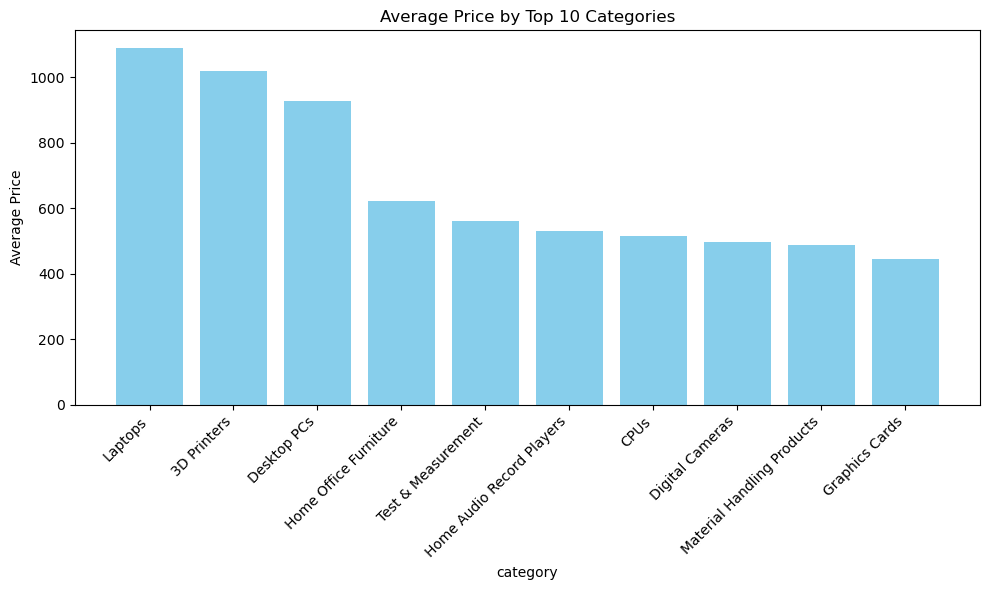

In [58]:
import matplotlib.pyplot as plt

avg_price_per_category = df.groupby("category")["price"].mean()
sorted_categories = avg_price_per_category.sort_values(ascending=False).index[:10]

# Filter the data for the top 10 categories
top_10_avg_prices = avg_price_per_category.loc[sorted_categories]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_avg_prices.index, top_10_avg_prices.values, color="skyblue")
plt.xlabel("category")
plt.ylabel("Average Price")
plt.title("Average Price by Top 10 Categories")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [23]:
# Box Plots:
# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\Elechiguerra\AppData\Local\Temp\ipykernel_13308\1308422724.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="stars", data=filtered_df, palette="Set3")


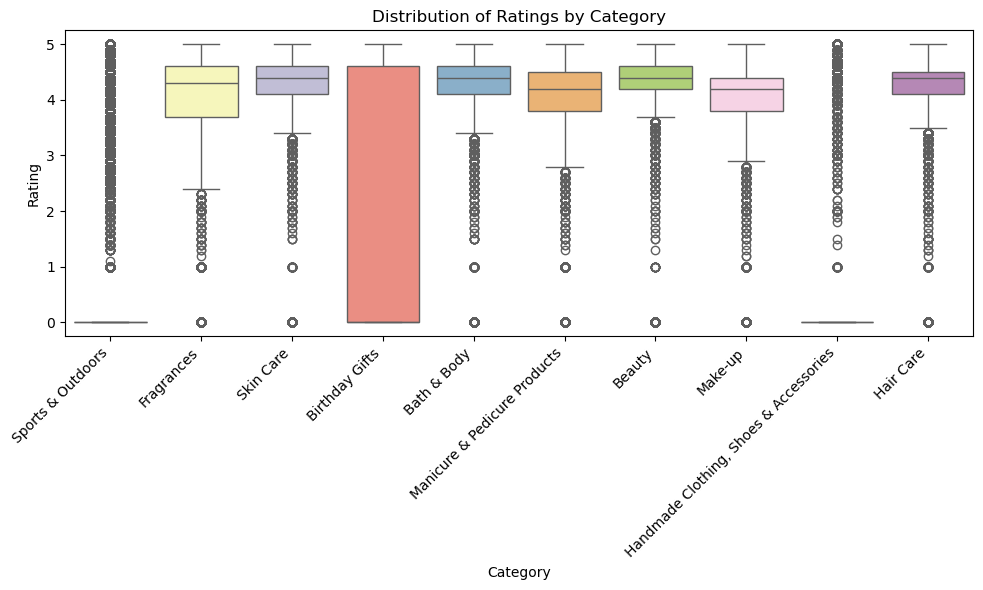

The category with the highest median rating is: Bath & Body


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 10 categories based on count
top_10_categories = df["category"].value_counts().nlargest(10).index
filtered_df = df[df["category"].isin(top_10_categories)]

# Create side-by-side box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="stars", data=filtered_df, palette="Set3")
plt.title("Distribution of Ratings by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Identify the category with the highest median rating
highest_median_category = filtered_df.groupby("category")["stars"].median().idxmax()
print(f"The category with the highest median rating is: {highest_median_category}")


In [24]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

In [25]:
# Correlation Coefficients:
# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?

In [60]:
# Calculating the Pearson correlation coefficient between 'stars' and 'price' columns
correlation = df['stars'].corr(df['price'])
correlation

-0.12490673262149235

In [61]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea' 
correlation = df['stars'].corr(df['price'], method='spearman')
correlation

-0.13316425462434212

In [ ]:
# There’s a slight tendency for lower-priced products to have slightly higher ratings, but the effect is not strong.

In [26]:
# Visualizations:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Use a correlation heatmap to visualize correlations between all numerical variables.
# Examine if product prices typically follow a normal distribution using a QQ plot.

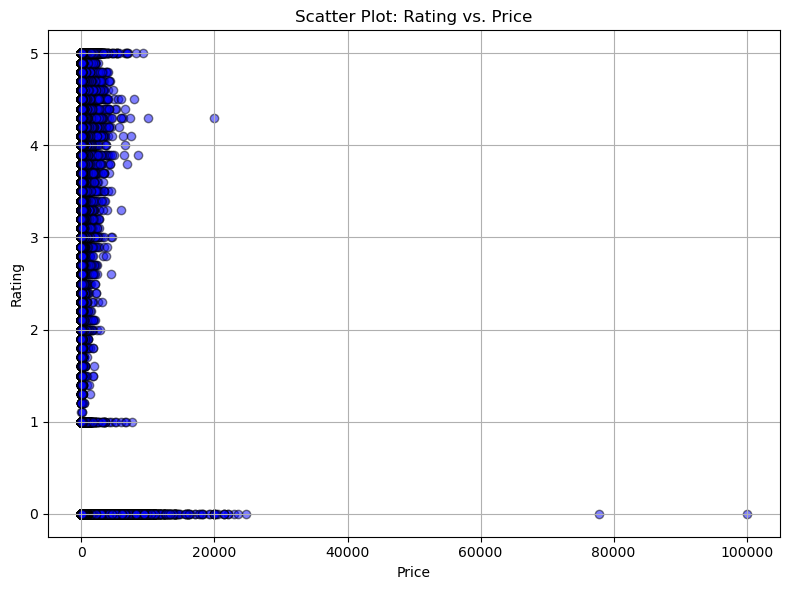

In [62]:
#Scatter plot: rating vs price

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df["price"], df["stars"], alpha=0.5, color="b", edgecolors="k")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Scatter Plot: Rating vs. Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# correlation heatmap

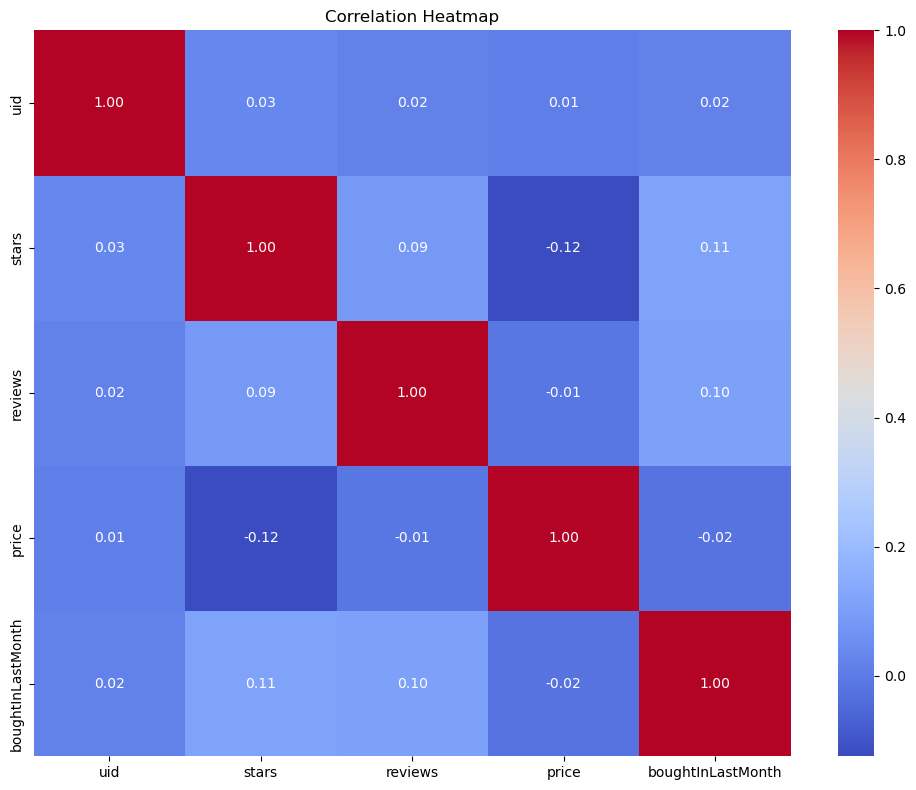

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Add title and adjust layout
plt.title("Correlation Heatmap")
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# QQ Plot for Price Distribution

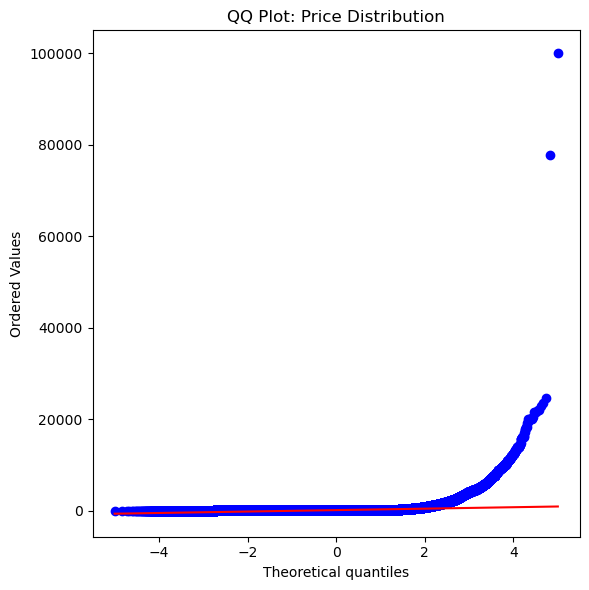

In [69]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(df["price"], dist="norm", plot=plt)
plt.title("QQ Plot: Price Distribution")
plt.tight_layout()
plt.show()
